## Ride Dataset

In [44]:
# Print the information of ride_sharing
from asyncore import read
import pandas as pd
# import numpy as np


ride_sharing = pd.read_csv('new_ride', index_col = 0)
ride_sharing1 = pd.read_csv('ride_sharing_new.csv', index_col = 0)

print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 0 to '
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ride_id          78 non-null     float64
 1   duration         78 non-null     float64
 2   station_A_id     78 non-null     float64
 3   station_A_name   78 non-null     object 
 4   station_B_id     78 non-null     float64
 5   station_B_name   78 non-null     object 
 6   bike_id          78 non-null     float64
 7   user_type        78 non-null     object 
 8   user_birth_year  78 non-null     float64
 9   user_gender      78 non-null     object 
 10  tire_sizes       78 non-null     float64
 11  ride_date        78 non-null     object 
dtypes: float64(7), object(5)
memory usage: 8.0+ KB
None
count             78
unique             2
top       Subscriber
freq              71
Name: user_type, dtype: object
count             78
unique             2
top       Subscriber
freq              71
Nam

In [45]:
print(ride_sharing)

    ride_id  duration  station_A_id  \
'                                     
0       0.0      11.0          16.0   
1       1.0       8.0           3.0   
2       2.0      11.0          15.0   
3       3.0       7.0          21.0   
4       4.0      11.0          81.0   
..      ...       ...           ...   
74     71.0      11.0           3.0   
75     71.0      11.0           3.0   
76     89.0       9.0          15.0   
77     89.0       9.0          15.0   
'       NaN       NaN           NaN   

                                       station_A_name  station_B_id  \
'                                                                     
0                             Steuart St at Market St          93.0   
1        Powell St BART Station (Market St at 4th St)          93.0   
2   San Francisco Ferry Building (Harry Bridges Pl...          67.0   
3    Montgomery St BART Station (Market St at 2nd St)          50.0   
4                                  Berry St at 4th St          21.

In [46]:
# Strip duration of minutes
ride_sharing1['duration_trim'] = ride_sharing1['duration'].str.strip("minutes")

# Convert duration to integer
ride_sharing1['duration_time'] = ride_sharing1['duration_trim'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing1['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing1[['duration','duration_trim','duration_time']])
print(sum(ride_sharing1['duration_time'])/len(ride_sharing1['duration_time']))


         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
11.389052795031056


In [47]:
# # Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].round().astype('Int64')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())


# count     25760
# unique        2
# top          27
# freq      13274
# Name: tire_sizes, dtype: int64


count     78
unique     2
top       27
freq      45
Name: tire_sizes, dtype: int64


In [48]:
# # Convert ride_date to date
# ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date']).dt.date

# # Save today's date
# today = dt.date.today()

# # Set all in the future to today's date
# ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# # Print maximum of ride_dt column
# print(ride_sharing['ride_dt'].max())

In [49]:
ride_sharing['ride_id'] = ride_sharing['ride_id'].round().astype('Int64')
ride_sharing['duration'] = ride_sharing['duration'].round().astype('Int64')
ride_sharing['user_birth_year'] = ride_sharing['user_birth_year'].round().astype('Int64')

# Find duplicates
duplicates = ride_sharing.duplicated(subset = ['ride_id'], keep = False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values(by = 'ride_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration','user_birth_year']])

    ride_id  duration  user_birth_year
'                                     
22       33        10             1979
39       33         2             1979
53       55         9             1985
65       55         9             1985
74       71        11             1997
75       71        11             1997
76       89         9             1986
77       89         9             2060


In [50]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

## Airline Dataset

In [51]:
airlines = pd.read_csv("airlines_final.csv", index_col=0)
print(airlines)

        id        day        airline        destination    dest_region  \
0     1351    Tuesday    UNITED INTL             KANSAI           Asia   
1      373     Friday         ALASKA  SAN JOSE DEL CABO  Canada/Mexico   
2     2820   Thursday          DELTA        LOS ANGELES        West US   
3     1157    Tuesday      SOUTHWEST        LOS ANGELES        West US   
4     2992  Wednesday       AMERICAN              MIAMI        East US   
...    ...        ...            ...                ...            ...   
2804  1475    Tuesday         ALASKA       NEW YORK-JFK        East US   
2805  2222   Thursday      SOUTHWEST            PHOENIX        West US   
2806  2684     Friday         UNITED            ORLANDO        East US   
2807  2549    Tuesday        JETBLUE         LONG BEACH        West US   
2808  2162   Saturday  CHINA EASTERN            QINGDAO           Asia   

     dest_size boarding_area   dept_time  wait_min     cleanliness  \
0          Hub  Gates 91-102  2018-12-31 

In [52]:
airlines1 = pd.read_csv("new_arlines.csv", index_col=0)
print(airlines1)

        id        day        airline        destination    dest_region  \
0     1351    Tuesday    UNITED INTL             KANSAI           Asia   
1      373     Friday         ALASKA  SAN JOSE DEL CABO  Canada/Mexico   
2     2820   Thursday          DELTA        LOS ANGELES        West US   
3     1157    Tuesday      SOUTHWEST        LOS ANGELES        West US   
4     2992  Wednesday       AMERICAN              MIAMI        East US   
...    ...        ...            ...                ...            ...   
2804  1475    Tuesday         ALASKA       NEW YORK-JFK        East US   
2805  2222   Thursday      SOUTHWEST            PHOENIX        West US   
2806  2684     Friday         UNITED            ORLANDO        East US   
2807  2549    Tuesday        JETBLUE         LONG BEACH        West US   
2808  2162   Saturday  CHINA EASTERN            QINGDAO           Asia   

     dest_size boarding_area   dept_time  wait_min     cleanliness  \
0          Hub  Gates 91-102  2018-12-31 

In [53]:
categories = pd.read_csv("categories.csv", index_col=0)

# Print categories DataFrame
print(categories)

# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

print("# Question: Take a look at the output. Out of the cleanliness, safety and satisfaction columns, which one has an inconsistent category and what is it?\n--> cleanliness because it has an Unacceptable category.")

      cleanliness           safety          satisfaction
0           Clean          Neutral        Very satisfied
1         Average        Very safe               Neutral
2  Somewhat clean    Somewhat safe    Somewhat satisfied
3  Somewhat dirty      Very unsafe  Somewhat unsatisfied
4           Dirty  Somewhat unsafe      Very unsatisfied
Cleanliness:  ['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 

# Question: Take a look at the output. Out of the cleanliness, safety and satisfaction columns, which one has an inconsistent category and what is it?
--> cleanliness because it has an Unacceptable category.


In [54]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines1['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines1['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines1[cat_clean_rows])

       id        day           airline  destination  dest_region dest_size  \
4    2992  Wednesday          AMERICAN        MIAMI      East US       Hub   
18   2913     Friday  TURKISH AIRLINES     ISTANBUL  Middle East       Hub   
100  2321  Wednesday         SOUTHWEST  LOS ANGELES      West US       Hub   

    boarding_area   dept_time  wait_min   cleanliness         safety  \
4     Gates 50-59  2018-12-31     559.0  Unacceptable      Very safe   
18   Gates 91-102  2018-12-31     225.0  Unacceptable      Very safe   
100   Gates 20-39  2018-12-31     130.0  Unacceptable  Somewhat safe   

           satisfaction  
4    Somewhat satisfied  
18   Somewhat satisfied  
100  Somewhat satisfied  


In [55]:
# Print rows with consistent categories only
print(airlines[~cat_clean_rows])

        id       day        airline        destination    dest_region  \
0     1351   Tuesday    UNITED INTL             KANSAI           Asia   
1      373    Friday         ALASKA  SAN JOSE DEL CABO  Canada/Mexico   
2     2820  Thursday          DELTA        LOS ANGELES        West US   
3     1157   Tuesday      SOUTHWEST        LOS ANGELES        West US   
5      634  Thursday         ALASKA             NEWARK        East US   
...    ...       ...            ...                ...            ...   
2804  1475   Tuesday         ALASKA       NEW YORK-JFK        East US   
2805  2222  Thursday      SOUTHWEST            PHOENIX        West US   
2806  2684    Friday         UNITED            ORLANDO        East US   
2807  2549   Tuesday        JETBLUE         LONG BEACH        West US   
2808  2162  Saturday  CHINA EASTERN            QINGDAO           Asia   

     dest_size boarding_area   dept_time  wait_min     cleanliness  \
0          Hub  Gates 91-102  2018-12-31     115.0   

In [56]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# ['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
#  'Middle East' 'Europe' 'eur' 'Central/South America'
#  'Australia/New Zealand' 'middle east']
# ['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
#  'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


In [57]:
print("# Question: From looking at the output, what do you think is the problem with these columns?\n--> The dest_region column has inconsistent values due to capitalization and has one value that needs to be remapped and dest_size column has only inconsistent values due to leading and trailing spaces.")

# Question: From looking at the output, what do you think is the problem with these columns?
--> The dest_region column has inconsistent values due to capitalization and has one value that needs to be remapped and dest_size column has only inconsistent values due to leading and trailing spaces.


In [58]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# ['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
#  'Middle East' 'Europe' 'eur' 'Central/South America'
#  'Australia/New Zealand' 'middle east']
# ['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
#  'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower() 
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print("\n*****************************************\n")
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']

*****************************************

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


In [59]:
import numpy as np

# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday':'weekday', 
            'Thursday':'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

In [60]:
full_name = pd.read_csv("full_name.csv", index_col=0)
airlines['full_name'] = full_name

In [61]:
# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.","")

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Miss","")

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

/tmp/ipykernel_162642/3304348909.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")
/tmp/ipykernel_162642/3304348909.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  airlines['full_name'] = airlines['full_name'].str.replace("Mr.","")
/tmp/ipykernel_162642/3304348909.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")


In [62]:
print(airlines['full_name'])

0             Melodie Stuart
1            Dominic Shannon
2          Quintessa Tillman
3        Christine Nicholson
4            Regina Clements
                ...         
2804                     NaN
2805                     NaN
2806                     NaN
2807                     NaN
2808                     NaN
Name: full_name, Length: 2477, dtype: object


In [63]:
survey_response = pd.read_csv("survey_response.csv", index_col=0)
airlines['survey_response'] = survey_response

In [64]:
# Store length of each row in survey_response column
resp_length = airlines['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])


18    The airport personnell forgot to alert us of d...
19    The food in the airport was really really expe...
20    One of the other travelers was really loud and...
21    I don\'t remember answering the survey with th...
22    The airport personnel kept ignoring my request...
23    The chair I sat in was extremely uncomfortable...
24    I wish you were more like other airports, the ...
25    I was really unsatisfied with the wait times b...
27    The flight was okay, but I didn\'t really like...
28    We were really slowed down by security measure...
29    There was a spill on the aisle next to the bat...
30    I felt very unsatisfied by how long the flight...
Name: survey_response, dtype: object


## Banking Dataset

In [65]:
banking = pd.read_csv("banking.csv", index_col=0)
print(banking)

     cust_id  acct_amount acct_cur  inv_amount account_opened last_transaction
0   8C35540A     44244.71   dollar    35500.50       03-05-18         30-09-19
1   D5536652     86506.85   dollar    81921.86       21-01-18         14-01-19
2   A631984D     77799.33   dollar    46412.27       26-01-18         06-10-19
3   93F2F951     93875.24     euro    76563.35       21-08-17         10-07-19
4   DE0A0882     99998.35     euro    18669.01       05-06-17         15-01-19
..       ...          ...      ...         ...            ...              ...
92  CEC1CAE5     92169.14   dollar    77896.86       26-11-17         08-10-18
93  4C7F8638     21942.37   dollar    11715.24       14-07-18         02-02-19
94  A81D31B3     74010.15   dollar    48787.47       02-06-18         12-09-18
95  93A17007     40651.36   dollar     9387.87       28-05-17         08-03-19
96  E961CA44     27907.16   dollar    10967.69       23-10-17         11-07-19

[97 rows x 6 columns]


In [66]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1 

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

In [67]:
# Print the header of account_opened
print(banking['account_opened'].head())


#Datacamp output:

# <script.py> output:
#     0          2018-03-05
#     1            21-01-18
#     2    January 26, 2018
#     3            21-14-17
#     4            05-06-17
#     Name: account_opened, dtype: object

0    03-05-18
1    21-01-18
2    26-01-18
3    21-08-17
4    05-06-17
Name: account_opened, dtype: object


In [68]:
print("# Question: Take a look at the output. You tried converting the values to datetime using the default to_datetime() function without changing any argument, however received the following error: ValueError: month must be in 1..12\n")
print("Why do you think that is?\n---> The 21-14-17 entry is erroneous and leads to an error.")

# Question: Take a look at the output. You tried converting the values to datetime using the default to_datetime() function without changing any argument, however received the following error: ValueError: month must be in 1..12

Why do you think that is?
---> The 21-14-17 entry is erroneous and leads to an error.


In [69]:
# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce')

In [70]:
# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])

0     2018
1     2018
2     2018
3     2017
4     2017
      ... 
92    2017
93    2018
94    2018
95    2017
96    2017
Name: acct_year, Length: 97, dtype: object


In [71]:
age = pd.read_csv("age.csv", index_col=0)
banking['age'] = age
print(banking)

     cust_id  acct_amount acct_cur  inv_amount account_opened  \
0   8C35540A    44244.710   dollar    35500.50     2018-03-05   
1   D5536652    86506.850   dollar    81921.86     2018-01-21   
2   A631984D    77799.330   dollar    46412.27     2018-01-26   
3   93F2F951   103262.764   dollar    76563.35     2017-08-21   
4   DE0A0882   109998.185   dollar    18669.01     2017-05-06   
..       ...          ...      ...         ...            ...   
92  CEC1CAE5    92169.140   dollar    77896.86     2017-11-26   
93  4C7F8638    21942.370   dollar    11715.24     2018-07-14   
94  A81D31B3    74010.150   dollar    48787.47     2018-02-06   
95  93A17007    40651.360   dollar     9387.87     2017-05-28   
96  E961CA44    27907.160   dollar    10967.69     2017-10-23   

   last_transaction acct_year  age  
0          30-09-19      2018   60  
1          14-01-19      2018   60  
2          06-10-19      2018   32  
3          10-07-19      2017   37  
4          15-01-19      2017   38

In [72]:
age = pd.read_csv("age.csv", index_col=0)
banking['age'] = age
print(banking)

     cust_id  acct_amount acct_cur  inv_amount account_opened  \
0   8C35540A    44244.710   dollar    35500.50     2018-03-05   
1   D5536652    86506.850   dollar    81921.86     2018-01-21   
2   A631984D    77799.330   dollar    46412.27     2018-01-26   
3   93F2F951   103262.764   dollar    76563.35     2017-08-21   
4   DE0A0882   109998.185   dollar    18669.01     2017-05-06   
..       ...          ...      ...         ...            ...   
92  CEC1CAE5    92169.140   dollar    77896.86     2017-11-26   
93  4C7F8638    21942.370   dollar    11715.24     2018-07-14   
94  A81D31B3    74010.150   dollar    48787.47     2018-02-06   
95  93A17007    40651.360   dollar     9387.87     2017-05-28   
96  E961CA44    27907.160   dollar    10967.69     2017-10-23   

   last_transaction acct_year  age  
0          30-09-19      2018   60  
1          14-01-19      2018   60  
2          06-10-19      2018   32  
3          10-07-19      2017   37  
4          15-01-19      2017   38

In [73]:
birth_date = pd.read_csv("birth_date.csv", index_col=0)
banking['birth_date'] = birth_date
print(banking)

     cust_id  acct_amount acct_cur  inv_amount account_opened  \
0   8C35540A    44244.710   dollar    35500.50     2018-03-05   
1   D5536652    86506.850   dollar    81921.86     2018-01-21   
2   A631984D    77799.330   dollar    46412.27     2018-01-26   
3   93F2F951   103262.764   dollar    76563.35     2017-08-21   
4   DE0A0882   109998.185   dollar    18669.01     2017-05-06   
..       ...          ...      ...         ...            ...   
92  CEC1CAE5    92169.140   dollar    77896.86     2017-11-26   
93  4C7F8638    21942.370   dollar    11715.24     2018-07-14   
94  A81D31B3    74010.150   dollar    48787.47     2018-02-06   
95  93A17007    40651.360   dollar     9387.87     2017-05-28   
96  E961CA44    27907.160   dollar    10967.69     2017-10-23   

   last_transaction acct_year  age  birth_date  
0          30-09-19      2018   60  1962-06-09  
1          14-01-19      2018   60  1962-12-16  
2          06-10-19      2018   32  1990-09-12  
3          10-07-19    

In [75]:
# import datetime as dt

# # Store today's date and find ages
# today = dt.date.today()
# ages_manual = today.year - banking['birth_date'].dt.year

# # Find rows where age column == ages_manual
# age_equ = banking['age'] == ages_manual

# # Store consistent and inconsistent data
# consistent_ages = banking[age_equ]
# inconsistent_ages = banking[~age_equ]

# # Store consistent and inconsistent data
# print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

cust_id             0
acct_amount         0
acct_cur            0
inv_amount          0
account_opened      0
last_transaction    0
acct_year           0
age                 0
birth_date          0
dtype: int64


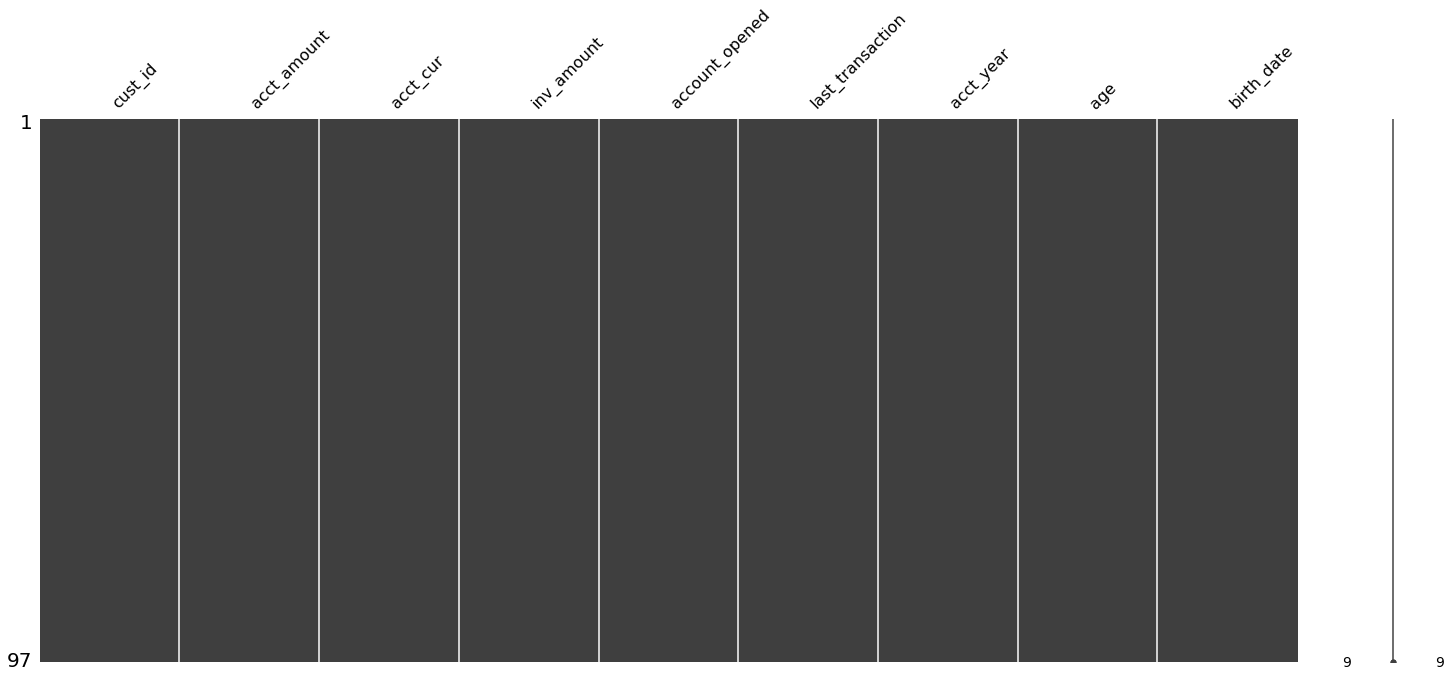

In [77]:
import missingno as msno
import matplotlib.pyplot as plt

# Print number of missing values in banking
print(banking.isna().sum())

#Datacamp output:

# <script.py> output:
#     cust_id              0
#     age                  0
#     acct_amount          0
#     inv_amount          13
#     account_opened       0
#     last_transaction     0
#     dtype: int64

# Visualize missingness matrix
msno.matrix(banking)
plt.show()


0     35500.50
1     81921.86
2     46412.27
3     76563.35
4     18669.01
        ...   
92    77896.86
93    11715.24
94    48787.47
95     9387.87
96    10967.69
Name: inv_amount, Length: 97, dtype: float64


In [79]:
# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

In [80]:
'''
In this exercise, you're working with another version of the banking DataFrame 
that contains missing values for both the cust_id column and the acct_amount column.

You want to produce analysis on how many unique customers the bank has, the average amount 
held by customers and more. You know that rows with missing cust_id don't really help you, 
and that on average acct_amount is usually 5 times the amount of inv_amount.

In this exercise, you will drop rows of banking with missing cust_ids, and impute 
missing values of acct_amount with some domain knowledge.
'''

# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount'] * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

cust_id             0
acct_amount         0
acct_cur            0
inv_amount          0
account_opened      0
last_transaction    0
acct_year           0
age                 0
birth_date          0
dtype: int64


## Restaurants Dataset

In [91]:
restaurants = pd.read_csv("restaurants.csv", index_col=0)
print(restaurants)

categories_res = ['italian', 'american', 'asian'] 

                      rest_name                  rest_addr           city  \
0    arnie morton  s of chicago   435 s. la cienega blv .     los angeles   
1           art  s delicatessen       12224 ventura blvd.     studio city   
2                     campanile       624 s. la brea ave.     los angeles   
3                         fenix    8358 sunset blvd. west       hollywood   
4            grill on the alley           9560 dayton way     los angeles   
..                          ...                        ...            ...   
331           vivande porta via         2125 fillmore st.   san francisco   
332          vivande ristorante      670 golden gate ave.   san francisco   
333                world wrapps         2257 chestnut st.   san francisco   
334                     wu kong             101 spear st.   san francisco   
335                   yank sing           427 battery st.   san francisco   

          phone cuisine_type  
0    3102461501      america  
1    81876212

In [92]:
# Import process from fuzzywuzzy
from fuzzywuzzy import process

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['cuisine_type'].unique()

# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))
print("********")
# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))
print("********")
# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit = len(unique_types)))

[('asian', 100), ('asiane', 91), ('asiann', 91), ('asiian', 91), ('asiaan', 91), ('asianne', 83), ('asiat', 80), ('italiann', 72), ('italiano', 72), ('italianne', 72), ('italian', 67), ('amurican', 62), ('american', 62), ('italiaan', 62), ('italiian', 62), ('itallian', 62), ('americann', 57), ('americano', 57), ('ameerican', 57), ('aamerican', 57), ('ameriican', 57), ('amerrican', 57), ('ammericann', 54), ('ameerrican', 54), ('ammereican', 54), ('america', 50), ('merican', 50), ('murican', 50), ('italien', 50), ('americen', 46), ('americin', 46), ('amerycan', 46), ('itali', 40)]
********
[('american', 100), ('americann', 94), ('americano', 94), ('ameerican', 94), ('aamerican', 94), ('ameriican', 94), ('amerrican', 94), ('america', 93), ('merican', 93), ('ammericann', 89), ('ameerrican', 89), ('ammereican', 89), ('amurican', 88), ('americen', 88), ('americin', 88), ('amerycan', 88), ('murican', 80), ('asian', 62), ('asiane', 57), ('asiann', 57), ('asiian', 57), ('asiaan', 57), ('italian

In [93]:
print("#Question: Take a look at the output, what do you think should be the similarity cutoff point when remapping categories?\n--> 80")

#Question: Take a look at the output, what do you think should be the similarity cutoff point when remapping categories?
--> 80


In [94]:
# Inspect the unique values of the cuisine_type column
print(restaurants['cuisine_type'].unique())

# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract('italian', restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))

# Inspect the first 5 matches
print("\n",matches[0:5])

['america' 'merican' 'amurican' 'americen' 'americann' 'asiane' 'itali'
 'asiann' 'murican' 'italien' 'italian' 'asiat' 'american' 'americano'
 'italiann' 'ameerican' 'asianne' 'italiano' 'americin' 'ammericann'
 'amerycan' 'aamerican' 'ameriican' 'italiaan' 'asiian' 'asiaan'
 'amerrican' 'ameerrican' 'ammereican' 'asian' 'italianne' 'italiian'
 'itallian']

 [('italian', 100, 11), ('italian', 100, 25), ('italian', 100, 41), ('italian', 100, 47), ('italian', 100, 49)]


In [95]:
# Iterate through the list of matches to italian
for match in matches:
  # Check whether the similarity score is greater than or equal to 80
  if match[1] >= 80:
    # Select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
    restaurants.loc[restaurants['cuisine_type'] == match[0]] = 'italian'

In [96]:
# Iterate through categories
for cuisine in categories:  
  # Create a list of matches, comparing cuisine with the cuisine_type column
  matches = process.extract(cuisine, restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))

  # Iterate through the list of matches
  for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      restaurants.loc[restaurants['cuisine_type'] == match[0]] = cuisine
      
# Inspect the final result
print(restaurants['cuisine_type'].unique())

['america' 'merican' 'amurican' 'americen' 'americann' 'asiane' 'italian'
 'asiann' 'murican' 'asiat' 'american' 'americano' 'ameerican' 'asianne'
 'americin' 'ammericann' 'amerycan' 'aamerican' 'ameriican' 'asiian'
 'asiaan' 'amerrican' 'ameerrican' 'ammereican' 'asian']
